### Load Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

### Prepare data

In [2]:
mnist = fetch_openml('mnist_784')

In [3]:
X = mnist.data
Y = mnist.target

### Analyze data

In [4]:
print(X.shape)
print(Y.shape)

(70000, 784)
(70000,)


In [5]:
np.unique(Y)

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

### Split data

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y,
                                               test_size=.20,
                                               random_state=10)

In [8]:
print(xtrain.shape, xtest.shape,ytrain.shape, ytest.shape)

(56000, 784) (14000, 784) (56000,) (14000,)


## Feature Scaling 
- Standard Scaler
- Minmax Scaler

In [9]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [10]:
print(xtrain.min(), xtrain.max())
print(xtest.min(), xtest.max())

0.0 255.0
0.0 255.0


### FS - Method 1

In [11]:
# std = StandardScaler()
minmax = MinMaxScaler(feature_range=(0,1))
scaled_training_data = minmax.fit_transform(xtrain)
scaled_testing_data = minmax.fit_transform(xtest)

In [12]:
# print(xtrain.var())
# print(xtrain.std())
# print(scaled_training_data.var())
# print(scaled_training_data.std())
print(scaled_training_data.min(), scaled_testing_data.min())
print(scaled_training_data.max(), scaled_testing_data.max())

0.0 0.0
1.0 1.0


### FS : Method 2

In [13]:
xtrain_scaled = xtrain/255.0
xtest_scaled = xtest/255.0

In [14]:
print(xtrain_scaled.max(),xtrain_scaled.min())

1.0 0.0


### Feature selection - PCA


In [15]:
from sklearn.decomposition import PCA

In [16]:
xtest_scaled.shape, xtrain_scaled.shape

((14000, 784), (56000, 784))

In [17]:
pca = PCA(.98)
# - By feature number
# - By percentage

In [18]:
xtrain_selected = pca.fit_transform(xtrain_scaled)
xtrain_selected.shape

(56000, 260)

In [19]:
xtest_selected = pca.transform(xtest_scaled)
print(xtest_selected.shape)

(14000, 260)


### Train Model

In [20]:
lg = LogisticRegression()
lg.fit(xtrain_selected, ytrain)

C:\Users\John\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
print("Training Score: ", lg.score(xtrain_selected, ytrain))
print("Testing Score: ", lg.score(xtest_selected, ytest))

Training Score:  0.933625
Testing Score:  0.9202857142857143


### Prediction

In [22]:
prediction = lg.predict(xtest_selected)

### Evaluation

In [23]:
accuracy_score(ytest, prediction)

0.9202857142857143

In [24]:
lg.predict_proba(xtest_selected[100].reshape(1,-1))
# print(ytest[100])

array([[3.62831781e-08, 9.84535371e-01, 4.72036308e-03, 5.34152228e-03,
        4.89233961e-06, 1.15168168e-03, 8.05857800e-05, 2.29742600e-03,
        1.21244339e-03, 6.55678493e-04]])

In [25]:
pd.Series(ytest).value_counts()

1    1515
7    1473
2    1438
3    1436
0    1421
9    1403
4    1391
8    1372
6    1303
5    1248
dtype: int64

In [26]:
confusion_matrix(ytest,prediction)

array([[1371,    0,    6,    3,    2,   14,   14,    2,    5,    4],
       [   0, 1476,    7,    3,    1,   12,    1,    2,   10,    3],
       [   7,   18, 1284,   27,   12,   11,   23,   20,   29,    7],
       [   4,    3,   31, 1286,    1,   51,    6,   18,   25,   11],
       [   4,    5,   11,    1, 1285,    3,   13,    5,   13,   51],
       [  16,    5,    5,   38,    7, 1094,   35,    6,   35,    7],
       [   5,    3,    9,    0,   12,   25, 1240,    0,    7,    2],
       [   3,    4,   21,   10,   12,    3,    2, 1362,    6,   50],
       [  17,   30,   20,   35,    4,   33,   13,    1, 1202,   17],
       [   7,    5,    6,   15,   29,    8,    0,   39,   10, 1284]],
      dtype=int64)

### Read images  from folders

In [27]:
import cv2
import os
data = []
for file_name in os.listdir('test/'):
    img = cv2.imread('test/'+file_name, 2)
    data.append(cv2.resize(img,(28,28)))
    print(file_name,'imported successfully!')


00.png imported successfully!
1.PNG imported successfully!
4.PNG imported successfully!
5.PNG imported successfully!
6.PNG imported successfully!
7.PNG imported successfully!
9.PNG imported successfully!
a.png imported successfully!
ab.png imported successfully!
Capture.PNG imported successfully!
t0.png imported successfully!
t01.png imported successfully!
t1.png imported successfully!
t2.png imported successfully!
t21.png imported successfully!
t223.png imported successfully!
t23.png imported successfully!
t3.png imported successfully!
test.png imported successfully!
WhatsApp Image 2021-08-11 at 7.52.50 AM (1).jpeg imported successfully!
WhatsApp Image 2021-08-11 at 7.52.50 AM (2).jpeg imported successfully!
WhatsApp Image 2021-08-11 at 7.52.50 AM.jpeg imported successfully!


In [28]:
dataset = np.array(data)

In [29]:
dataset.shape

(22, 28, 28)

In [30]:
final_ds = dataset.reshape(len(dataset), -1)
print(final_ds.shape)

(22, 784)


In [31]:
x_preprocessed = pca.transform(final_ds/255)

In [32]:
x_preprocessed.shape

(22, 260)

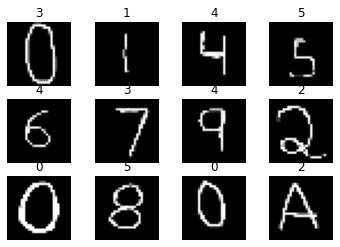

In [33]:
predictions = lg.predict(x_preprocessed)
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(data[i], cmap='gray')
    plt.title(predictions[i])
    plt.axis('off')

### Save/Export model to a file

In [34]:
import pickle

In [35]:
filename = "model.pkl"
file = open(filename,"wb")
pickle.dump(lg, file)
file.close()
print("model exported successfully!")

model exported successfully!


In [36]:
fl = open('pca.pkl','wb')
pickle.dump(pca,fl)
fl.close()

### Tkinter GUI

In [37]:
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk
import shutil
import pickle
import cv2
import wikipedia

In [38]:
win=tk.Tk()
win.title("Handwritten Digit Recognition")
win.geometry("700x450")
# win.resizable(0,0)
win.config(bg="#21347a")
l1=tk.Label(win,text="Handwritten Digit Recognition",bg="#21347a",fg="#65d8e0",font=("Garamond",30))
l1.place(x=127,y=20)

l2 = tk.Label(win, text="Upload a Image -",bg="#21347a",fg="#65d8e0",font=("Garamond",18))
l2.place(x=70,y=100)

def UploadFile():
    file_name = filedialog.askopenfilename(initialdir='/', title="Select A File", filetype=(("png","*.png"),("jpg","*.jpg"),("jpeg","*.jpeg")))
    label = tk.Label(win, text="")
    label.place(x=700,y=500)
    img = Image.open(file_name)
    image = ImageTk.PhotoImage(img.resize((220, 250)))
    lbl = tk.Label(win, image=image)
    lbl.image = image
    shutil.copy(file_name, "uploads")
    lbl.place(x=430,y=120)
    l3=tk.Label(win,text="Prediction -",bg="#21347a",fg="#65d8e0",font=("Garamond",40))
    l3.place(x=60,y=270)
    
    f = open("model.pkl",'rb')
    model = pickle.load(f)
    pca = pickle.load(open('pca.pkl','rb'))
    im=cv2.imread(file_name,2)
    tst = pca.transform(cv2.resize(im, (28,28)).reshape(1,-1)/255)
    prediction = model.predict(tst)[0]
    l4=tk.Label(win,text=prediction,bg="#21347a",fg="#65d8e0",font=("Garamond",40))
    l4.place(x=350,y=270)
    #search wikipedia
    
    l5 = tk.Text(win,font=("Garamond",16))
    l5.place(x=70, y=350)

    try:
        page = wikipedia.page(prediction)
        print(page.summary)
        l5.insert(tk.END, page.summary)
    except:
        pass
b1 = tk.Button(win, text="Search", command = UploadFile,bg="#7ac7de",pady=4,padx=18)
b1.place(x=270,y=103)

win.mainloop()

4 (four) is a number, numeral and digit. It is the natural number following 3 and preceding 5. It is the smallest composite number, and is considered unlucky in many East Asian cultures.
0 (zero) is a number, and the numerical digit used to represent that number in numerals. It fulfills a central role in mathematics as the additive identity of the integers, real numbers, and many other algebraic structures. As a digit, 0 is used as a placeholder in place value systems. Names for the number 0 in English include zero, nought (UK), naught (US; ), nil, or—in contexts where at least one adjacent digit distinguishes it from the letter "O"—oh or o (). Informal or slang terms for zero include zilch and zip.Ought and aught (), as well as cipher, have also been used historically.
